In [1]:
import shutil
import os
import numpy as np
import argparse

In [2]:
import random
import keras

In [3]:
from tensorflow.keras import Sequential

In [4]:
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image


In [5]:
path_test="C:\\Users\\DELL\\diff_crop_cnn"

In [6]:
Categories=["Croton","DumbCane","Horsebush","Screwpine","Silverleaf","Variegated screwpine"]

In [7]:
batch_count=[]
training=[]
def createTrainingData():
    for cat in Categories:
        path=os.path.join(path_test,cat)
        class_num=Categories.index(cat)
        num=1
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(48,48))
            training.append([new_array,class_num])
            num+=1
        batch_count.append(num)   


In [8]:
createTrainingData()

In [9]:
random.shuffle(training)

In [10]:
X=[]
Y=[]
for features,label in training:
    X.append(features)
    Y.append(label)
X=np.array(X).reshape(-1,48,48,3)

In [11]:
print(X)
print(shape(X))

[[[[170 181 179]
   [ 60  90  95]
   [ 90 110 134]
   ...
   [ 48 116 129]
   [ 48 116 129]
   [ 48 116 129]]

  [[212 226 238]
   [207 222 225]
   [122 146 152]
   ...
   [ 48 116 129]
   [ 48 116 129]
   [ 32  95 109]]

  [[ 82 136 136]
   [240 249 251]
   [179 192 196]
   ...
   [ 44  76 125]
   [102 163 184]
   [ 37 105 124]]

  ...

  [[ 62 112 146]
   [ 72 166 219]
   [101 201 253]
   ...
   [172 187 194]
   [203 214 222]
   [196 207 211]]

  [[ 93 102 100]
   [134 150 151]
   [196 212 218]
   ...
   [ 18  26  25]
   [ 40  48  48]
   [202 211 225]]

  [[ 77  90  81]
   [169 186 183]
   [164 177 178]
   ...
   [ 66  76  86]
   [151 170 183]
   [223 227 235]]]


 [[[ 14 135 145]
   [  2  57  45]
   [ 30  82  68]
   ...
   [ 15 130 143]
   [ 15 130 143]
   [ 15 130 143]]

  [[ 14 135 145]
   [ 10  60  47]
   [ 21  78  63]
   ...
   [ 15 130 143]
   [ 15 130 143]
   [ 15 130 143]]

  [[ 16 134 151]
   [ 10 137 150]
   [ 21  66  50]
   ...
   [ 15 131 142]
   [ 13 131 143]
   [ 15 130

In [12]:
from keras.utils import np_utils
y=np_utils.to_categorical(Y,6)

In [13]:
shape(Y)
Y=np.array(Y)

In [14]:
print(shape(Y))

(846,)


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [16]:
batch_size = 16
nb_classes =4
nb_epochs = 10
img_rows, img_columns = 48, 48
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((3, 3), strides=3),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((4, 4), strides=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6,  activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=20,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
43/43 [==============================] - 4s 46ms/step - loss: 1.6167 - accuracy: 0.3062 - val_loss: 1.3867 - val_accuracy: 0.3235
Epoch 2/20
43/43 [==============================] - 1s 26ms/step - loss: 1.0372 - accuracy: 0.5133 - val_loss: 0.8229 - val_accuracy: 0.6706
Epoch 3/20
43/43 [==============================] - 1s 27ms/step - loss: 0.8025 - accuracy: 0.6213 - val_loss: 0.7256 - val_accuracy: 0.6882
Epoch 4/20
43/43 [==============================] - 1s 28ms/step - loss: 0.7233 - accuracy: 0.6716 - val_loss: 0.6106 - val_accuracy: 0.7471
Epoch 5/20
43/43 [==============================] - 1s 27ms/step - loss: 0.6496 - accuracy: 0.7086 - val_loss: 0.5357 - val_accuracy: 0.7941
Epoch 6/20
43/43 [==============================] - 1s 27ms/step - loss: 0.6299 - accuracy: 0.6938 - val_loss: 0.5394 - val_accuracy: 0.7941
Epoch 7/20
43/43 [==============================] - 1s 25ms/step - loss: 0.5644 - accuracy: 0.7559 - val_loss: 0.5379 - val_accuracy: 0.7941
Epoch 8/20
43

In [30]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.39285534620285034
Test accuracy:  0.8705882430076599


In [29]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=25,verbose=1,validation_data=(X_test,y_test))

Epoch 1/25
43/43 [==============================] - 1s 29ms/step - loss: 0.1743 - accuracy: 0.9246 - val_loss: 0.3739 - val_accuracy: 0.8765
Epoch 2/25
43/43 [==============================] - 1s 27ms/step - loss: 0.2114 - accuracy: 0.9186 - val_loss: 0.3226 - val_accuracy: 0.8765
Epoch 3/25
43/43 [==============================] - 1s 26ms/step - loss: 0.1732 - accuracy: 0.9305 - val_loss: 0.3866 - val_accuracy: 0.8471
Epoch 4/25
43/43 [==============================] - 1s 27ms/step - loss: 0.1379 - accuracy: 0.9497 - val_loss: 0.4288 - val_accuracy: 0.8353
Epoch 5/25
43/43 [==============================] - 1s 27ms/step - loss: 0.1508 - accuracy: 0.9482 - val_loss: 0.3550 - val_accuracy: 0.8412
Epoch 6/25
43/43 [==============================] - 1s 21ms/step - loss: 0.1419 - accuracy: 0.9482 - val_loss: 0.3318 - val_accuracy: 0.8824
Epoch 7/25
43/43 [==============================] - 1s 21ms/step - loss: 0.1398 - accuracy: 0.9467 - val_loss: 0.4121 - val_accuracy: 0.8706
Epoch 8/25
43

In [22]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.3613262474536896
Test accuracy:  0.8647058606147766


### Metrics

In [23]:
y_pred=model.predict(X_test,verbose=0)
print(y_pred)


[[2.29091123e-02 5.34303690e-05 4.51735705e-02 1.00492876e-07
  9.31826293e-01 3.73951552e-05]
 [1.15733761e-04 3.95923061e-03 1.25191220e-12 9.57913653e-06
  2.50054977e-10 9.95915473e-01]
 [5.45978935e-07 9.98778522e-01 2.49741206e-15 3.58950347e-05
  1.52123333e-12 1.18506176e-03]
 ...
 [9.99981046e-01 1.65765107e-06 1.06415848e-06 2.96810354e-11
  1.03569018e-05 5.81353061e-06]
 [1.18996340e-05 1.81930204e-08 9.60509717e-01 5.65194003e-10
  3.94782871e-02 1.64318230e-08]
 [1.15407642e-03 2.92937534e-06 3.35484713e-01 1.15215943e-08
  6.63353205e-01 5.11636244e-06]]


In [24]:
y_predval=[]
for i in y_pred:
    y_predval.append(np.argmax(i))

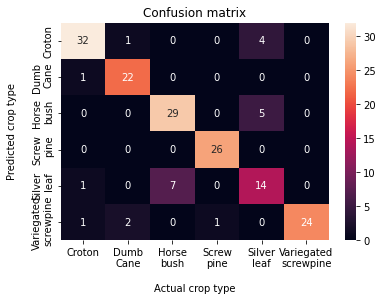

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predval)
f = sns.heatmap(cm, annot=True, fmt='d')
f.set_title("Confusion matrix")

f.xaxis.set_ticklabels(["Croton","Dumb\nCane","Horse\nbush","Screw\npine","Silver\nleaf","Variegated\nscrewpine"])
f.yaxis.set_ticklabels(["Croton","Dumb\nCane","Horse\nbush","Screw\npine","Silver\nleaf","Variegated\nscrewpine"])
plt.ylabel("Predicted crop type",labelpad=15)
plt.xlabel("Actual crop type",labelpad=15)
plt.show()

### Accuracy, Precision, Recall and f1-score

In [26]:
import numpy
import sklearn.metrics
import numpy
import sklearn.metrics

r = sklearn.metrics.confusion_matrix(y_test, y_predval)


tp=r[0][0]+r[1][1]+r[2][2]+r[3][3]+r[4][4]+r[5][5]

acc = tp / numpy.sum(r)
print("Accuracy :")
print(acc)
target_names=["Croton","DumbCane","Horsebush","Screwpine","Silverleaf","Variegated screwpine"]
precision = sklearn.metrics.classification_report(y_test,y_predval,target_names=target_names)
print(precision)

Accuracy :
0.8647058823529412
                      precision    recall  f1-score   support

              Croton       0.91      0.86      0.89        37
            DumbCane       0.88      0.96      0.92        23
           Horsebush       0.81      0.85      0.83        34
           Screwpine       0.96      1.00      0.98        26
          Silverleaf       0.61      0.64      0.62        22
Variegated screwpine       1.00      0.86      0.92        28

            accuracy                           0.86       170
           macro avg       0.86      0.86      0.86       170
        weighted avg       0.87      0.86      0.87       170



### Classification

In [27]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img("pic7.jpeg",target_size=(48,48))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
arr=model.predict(test_image)
arr=numpy.ndarray.tolist(arr)
t=arr[0].index(max(arr[0]))
print("Predicted Stage : ",Categories[t])

1/1 [==============================] - 0s 252ms/step
Predicted Stage :  Horsebush


In [28]:
model.save('classify_crop_trial2')

INFO:tensorflow:Assets written to: classify_crop_trial2\assets


INFO:tensorflow:Assets written to: classify_crop_trial2\assets


In [34]:
from tensorflow import keras
model = keras.models.load_model('classify_crop_trial2')

In [35]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.3613262474536896
Test accuracy:  0.8647058606147766
